In [54]:
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import community
import pickle
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
import csv


## Step1: Load the data and visualization

In [2]:
with open('Network_LCC.pkl', 'rb') as fp:
    Network = pickle.load(fp)

In [49]:
G=Network['2018-04-28']

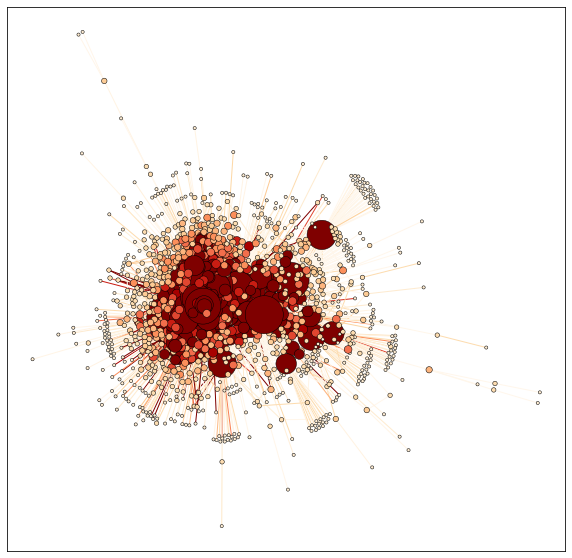

In [50]:
pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color=weights.values(),edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)


plt.show()

In [152]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):

    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)
            

In [1]:
draw_adjacency_matrix(G)

NameError: name 'draw_adjacency_matrix' is not defined

C:\Users\wyw25\AppData\Local\Temp/ipykernel_8148/1152433118.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


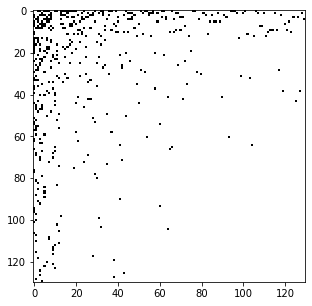

In [154]:
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

In [155]:
adjacency_matrix = nx.to_numpy_array(G,weight=None)

## Step2: Data Sample to matrix

In [51]:
datelist=['2018-01-12','2018-01-14','2018-01-15','2018-01-16','2018-01-17',
            '2018-01-18','2018-01-19','2018-01-20','2018-01-21','2018-01-22','2018-01-23','2018-01-24',
            '2018-01-25','2018-01-26','2018-01-27','2018-01-28','2018-01-29','2018-01-30','2018-01-31', 
            '2018-02-01','2018-02-02','2018-02-03','2018-02-04','2018-02-05','2018-02-06','2018-02-07',
            '2018-02-08','2018-02-09','2018-02-10','2018-02-11','2018-02-12','2018-02-13','2018-02-14',
            '2018-02-15','2018-02-16','2018-02-17','2018-02-18','2018-02-19','2018-02-20','2018-02-21',
            '2018-02-22','2018-02-23','2018-02-24','2018-02-25','2018-02-26','2018-02-27','2018-02-28',
            '2018-03-01', '2018-03-02','2018-03-05','2018-03-20','2018-03-31','2018-04-30','2018-05-31',
            '2018-06-30','2018-07-31','2018-08-31','2018-09-21','2018-09-30',]

In [58]:
for date in datelist:
    G=Network[date]
    adjacency_matrix = nx.to_numpy_array(G,weight=None).astype(int)
    with open("C:/Users/wyw25/thesis/MAT_experiment/"+str(date)+".csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(adjacency_matrix)
    


In [ ]:
plt.plot(NODF_small.values())

## Step3: Generate NUll models:

The idea in this part is generating three kinds of null model (EE, FF, PP) and store them for NODF IBN Q.

In [3]:
def Visual_Graph(G):
#    pos =nx.spring_layout(G, k=0.15)
    pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
    #pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
    d = dict(G.degree)
    plt.figure(3,figsize=(10,10)) 
    nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
    nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_cmap=plt.cm.OrRd)
    
    plt.show()

In [4]:
def EE_null(n_nodes,n_links):
    # EE model - Erdos Renyi - random, random
    #p=n_links*2/(n*(n-1))
    #G1=nx.fast_gnp_random_graph(n,p)
    G_EE=nx.gnm_random_graph(n_nodes, n_links, seed=None, directed=False)
    G_EE = nx.Graph(G_EE)
    G_EE.remove_edges_from(nx.selfloop_edges(G_EE))
    
    return G_EE

In [5]:
def FF_null(G): 
    # FF model - fix degree sequnce
  #  net_size=0
  #  while net_size < N:
    G_FF = nx.configuration_model(dict(G.degree()).values())
    G_FF = nx.Graph(G_FF)
    G_FF.remove_edges_from(nx.selfloop_edges(G_FF))
    #net_size=len(G_FF)
    
    return G_FF

In [6]:
def PP_null(P):
    # keep porpotional
    adjacency = np.random.rand(*P.shape) <= P
    G_PP = nx.from_numpy_matrix(adjacency, nx.DiGraph) 
    G_PP = nx.Graph(G_PP)
    G_PP.remove_edges_from(nx.selfloop_edges(G_PP))
    
    return G_PP

In [7]:
def PEEP_null(P):
    # keep porpotional for row and column for everage

    adjacency = np.random.rand(*P.shape) <= P
    G_PEEP = nx.from_numpy_matrix(adjacency, nx.DiGraph) 
    G_PEEP = nx.Graph(G_PEEP)
    G_PEEP.remove_edges_from(nx.selfloop_edges(G_PEEP))
    
    return G_PEEP

In [8]:
def Make_Null_Model(G):
    # basic count for the network
    adjacency_matrix = nx.to_numpy_array(G,weight=None)
    degree_arr=sum(adjacency_matrix)
    n_nodes=len(degree_arr)
    n_links=sum(degree_arr)/2
    
    # make matrix for pp
    degree_arr_T=degree_arr.reshape(n_nodes, 1)
    degree_arr_=degree_arr.reshape(1, n_nodes)
    link_mat_PP=np.dot(degree_arr_T,degree_arr_)
    P_PP=link_mat_PP/(n_links*4)
    
    # make matrix for pEEp  
    one1=np.ones((1, n_nodes))
    one2=np.ones((n_nodes, 1))
    mat_r=np.dot(degree_arr_T,one1)
    mat_c=np.dot(one2,degree_arr_)
    link_mat_PEEP=(mat_r+mat_c)/2
    P_PEEP=link_mat_PEEP/(n_nodes*2)

    # calculation
    G_EE=EE_null(n_nodes,n_links)
    G_FF=FF_null(G) 
    G_PP=PP_null(P_PP) 
    G_PEEP= PEEP_null(P_PEEP)
    
    return G_EE, G_FF, G_PP,  G_PEEP
    

In [406]:
G_EE, G_FF, G_PP, G_PEEP=Make_Null_Model(G)

C:\Users\wyw25\AppData\Local\Temp/ipykernel_8148/1152433118.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


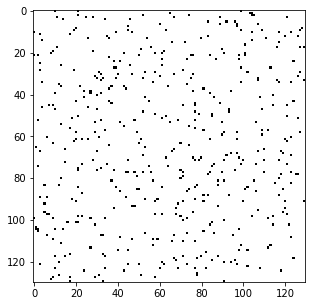

In [400]:
draw_adjacency_matrix(G_EE)

C:\Users\wyw25\AppData\Local\Temp/ipykernel_8148/1152433118.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


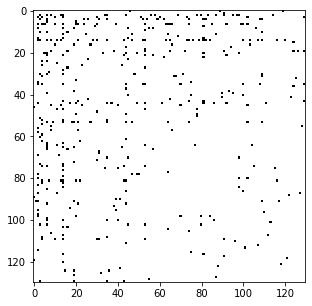

In [401]:
draw_adjacency_matrix(G_FF)

C:\Users\wyw25\AppData\Local\Temp/ipykernel_8148/1152433118.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


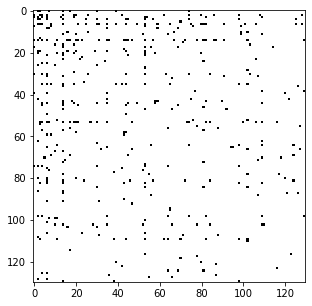

In [352]:
draw_adjacency_matrix(G_PP)

C:\Users\wyw25\AppData\Local\Temp/ipykernel_8148/1152433118.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


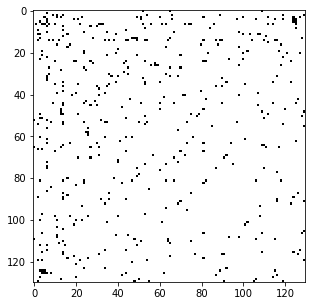

In [411]:
draw_adjacency_matrix(G_PEEP)

In [12]:
def Making_Sample(num,G):
    G_ee_dic={}
    G_ff_dic={}
    G_pp_dic={}
    G_peed_dic={}
    for i in range(num):
        G_EE, G_FF, G_PP, G_PEEP=Make_Null_Model(G)
        G_ee_dic[i]=G_EE
        G_ff_dic[i]=G_FF
        G_pp_dic[i]=G_PP
        G_peed_dic[i]=G_PEEP
    
    G_GROSS={'GEE':G_ee_dic,'GFF':G_ff_dic,'GPP':G_pp_dic,'GPEED':G_peed_dic}
    
    return G_GROSS
 

In [10]:
NULL_MODEL_DIC={}
for date in tqdm(Network.keys()):
    G_GROSS=Making_Sample(1000,Network[date])
    NULL_MODEL_DIC[date]=G_GROSS

  1%|▋                                                                             | 12/1456 [04:38<9:19:28, 23.25s/it]


KeyboardInterrupt: 

In [10]:
datelist=['2018-01-12','2018-01-14','2018-01-15','2018-01-16','2018-01-17',
            '2018-01-18','2018-01-19','2018-01-20','2018-01-21','2018-01-22','2018-01-23','2018-01-24',
            '2018-01-25','2018-01-26','2018-01-27','2018-01-28','2018-01-29','2018-01-30','2018-01-31', 
            '2018-02-01','2018-02-02','2018-02-03','2018-02-04','2018-02-05','2018-02-06','2018-02-07',
            '2018-02-08','2018-02-09','2018-02-10','2018-02-11','2018-02-12','2018-02-13','2018-02-14',
            '2018-02-15','2018-02-16','2018-02-17','2018-02-18','2018-02-19','2018-02-20','2018-02-21',
            '2018-02-22','2018-02-23','2018-02-24','2018-02-25','2018-02-26','2018-02-27','2018-02-28',
            '2018-03-01', '2018-03-02','2018-03-05','2018-03-20','2018-03-31','2018-04-30','2018-05-31',
            '2018-06-30','2018-07-31','2018-08-31','2018-09-21','2018-09-30',]

In [3]:
datelist2=[
            '2018-02-22','2018-02-23','2018-02-24','2018-02-25','2018-02-26','2018-02-27','2018-02-28',
            '2018-03-01', '2018-03-02','2018-03-05','2018-03-20','2018-03-31','2018-04-30','2018-05-31',
            '2018-06-30','2018-07-31','2018-08-31','2018-09-21','2018-09-30']

In [10]:
datelist3=[
            '2018-03-05','2018-03-20','2018-03-31','2018-04-30','2018-05-31',
            '2018-06-30','2018-07-31','2018-08-31','2018-09-21','2018-09-30']

In [13]:
NULL_MODEL_DIC={}
for date in tqdm(datelist):
    G_GROSS=Making_Sample(200,Network[date])
    NULL_MODEL_DIC[date]=G_GROSS

100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [1:51:13<00:00, 113.10s/it]


In [18]:
len(NULL_MODEL_DIC)

6

In [14]:
with open('null_model.pkl', 'wb') as fp:
    pickle.dump(NULL_MODEL_DIC,fp)
   

## Step5: Make Null Model to CSV

In [ ]:
# structure:
# under each year: (folder)
# 1000 GEE --- to 1000 matrix   (folder)
# 1000 GFF --- to 1000 matrix   (folder)
# 1000 GPP --- to 1000 matrix   (folder)
# 1000 GPEEP --- to 1000 matrix (folder) 

In [ ]:
with open('null_model_40.pkl', 'rb') as fp:
    Null40= pickle.load(fp)

In [ ]:
def Model_to_mat(G,i,date,nulltype):
    adjacency_matrix = nx.to_numpy_array(G,weight=None).tolist()
 #   adjmat=(adjacency_matrix*1).tolist()
    with open("C:/Users/wyw25/thesis/null_model_generate/"+str(date)+"/"+nulltype+"/mat"+str(year)+"_"+str(i)+".csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(adjmat)
    

In [ ]:
for date in Null40.key():
    # create folder of year
    newpath = r"C:/Users/wyw25/thesis/null_model_generate/"+str(date)
    if not os.path.exists(newpath):
        os.makedirs(newpath)
        
    newpath1 = r"C:/Users/wyw25/thesis/null_model_generate/"+str(date)+"/EE"
    if not os.path.exists(newpath1):
        os.makedirs(newpath1)
    newpath2 = r"C:/Users/wyw25/thesis/null_model_generate/"+str(date)+"/FF"
    if not os.path.exists(newpath2):
        os.makedirs(newpath2)
    newpath3 = r"C:/Users/wyw25/thesis/null_model_generate/"+str(date)+"/PP"
    if not os.path.exists(newpath3):
        os.makedirs(newpath3)
    newpath4 = r"C:/Users/wyw25/thesis/null_model_generate/"+str(date)+"/PEEP"
    if not os.path.exists(newpath4):
        os.makedirs(newpath4)
        
    for i in range(1000):
        Model_to_mat(Null40[date]['GEE'][i],i,date,'EE')
        Model_to_mat(Null40[date]['GFF'][i],i,date,'FF')
        Model_to_mat(Null40[date]['GPP'][i],i,date,'PP')
        Model_to_mat(Null40[date]['GPEED'][i],i,date,'PEEP')

## Step6: Statistical Analysis

In [38]:
G_test=Network['2018-04-01']

In [ ]:
Visual_Graph(G_test):

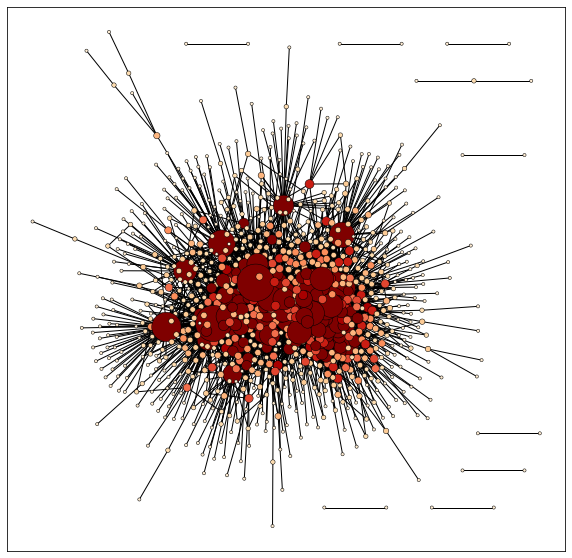

In [40]:
pos = nx.nx_agraph.graphviz_layout(G_test, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G_test.degree)
weights = nx.get_edge_attributes(G_test,'weight')
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G_test,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G_test,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_cmap=plt.cm.OrRd)


plt.show()

In [55]:
G = nx.configuration_model(dict(G_test.degree()).values())

In [44]:
G = nx.random_degree_sequence_graph(dict(G_test.degree()).values(), seed=42)
sorted(d for n, d in G.degree())

KeyboardInterrupt: 

In [48]:
G = nx.expected_degree_graph(dict(G_test.degree()).values())

In [52]:
G=nx.havel_hakimi_graph(dict(G_test.degree()).values(), create_using=None)

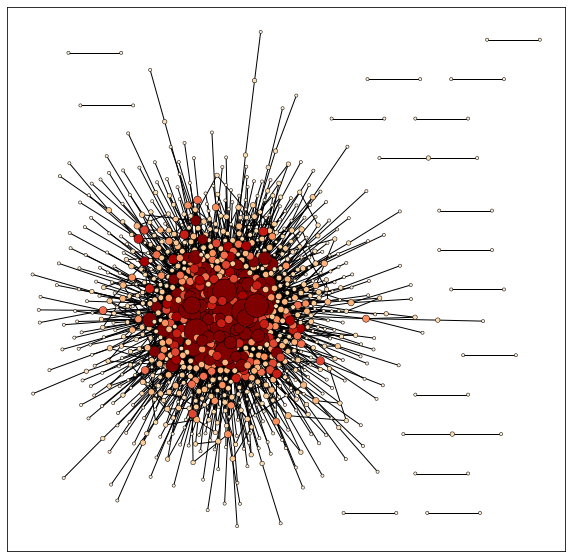

In [56]:
Visual_Graph(G)